References:

https://stackoverflow.com/questions/15589517/how-to-crop-an-image-in-opencv-using-python

https://stackoverflow.com/questions/24101524/finding-median-of-list-in-python




Test

420


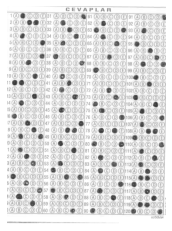

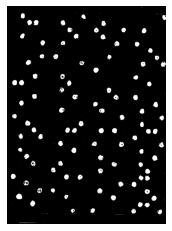

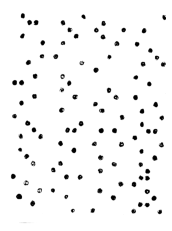

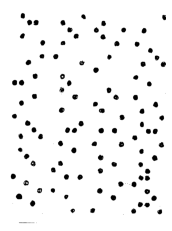

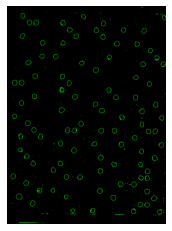

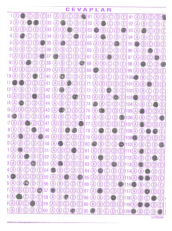

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
path = r"C:\Danyal\Work\FAST\Semester 5\Digital Image Processing\Project\Optical-Mark-Recognition\Dataset\unnamed (4).jpg"
img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
# TODO : Reading the image again in coloured mode
img_color = cv2.imread(path,cv2.IMREAD_COLOR)
# img = img - 255
img_color = img_color[3770:7200, 2141:4500]
img = img[3770:7210, 2141:4500]
img = cv2.GaussianBlur(img,(3,3),1,0)
thresh, out = cv2.threshold(img,150,255,cv2.THRESH_BINARY)
# Applying dilation first since image not negative
kernel = np.ones((3,3),np.uint8)
dilation = cv2.dilate(out,kernel,iterations = 1)
#Applying erosion with a different kernel
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(dilation,kernel,iterations = 1)
# edged = cv2.Canny(out, 30, 200)

#Function to calculate Median value of a list
def median(lst):
    sortedLst = sorted(lst)
    lstLen = len(lst)
    index = (lstLen - 1) // 2
   
    if (lstLen % 2):
        return sortedLst[index]
    else:
        return (sortedLst[index] + sortedLst[index + 1])/2.0

out = out - 255
width = []
height = []
contours, hierarchy = cv2.findContours(out,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contours)):
    x,y,w,h = cv2.boundingRect(contours[i])
    width.append(w)
    height.append(h)
    cv2.rectangle(img_color, (x, y), (x+w, y+h), (255, 0, 0), 4)
print (len(contours))

#Printing the median values of the width and height to get size of one row of options
print(median(width))
print(median(height))



# print(contours)
# TODO : Drawing contours
temp = np.zeros_like(img_color)
cv2.drawContours(temp,contours,-1,(0,255,0),3)

# cv2.imshow('Contours', out)
# cv2.waitKey(0)
# cv2.destroyAllWindows

plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(out, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(dilation, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(erosion, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(temp, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(img_color)
plt.axis('off')
plt.show()